In [1]:
#installing nltk 
!pip install nltk

     |████████████████████████████████| 1.5 MB 8.6 MB/s eta 0:00:01
     |████████████████████████████████| 97 kB 20.5 MB/s eta 0:00:01
     |████████████████████████████████| 749 kB 49.7 MB/s eta 0:00:01
     |████████████████████████████████| 76 kB 14.7 MB/s eta 0:00:01


In [2]:
#importing few of the libraries i will need for dataframe:
import pandas as pd

In [3]:
pip install openpyxl #need this for excel load

     |████████████████████████████████| 242 kB 8.0 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
train = pd.read_excel('RATINGDATA.xlsx', index_col=0) #loading excel
train.head() #showing the first rows

,Short_Review,Rating,Full_Review
0,Fabulous!,5.0,"i loved it, superb performance, awesome batter..."
1,Super!,5.0,I wonder why nobody posted pics for snow white...
2,Just wow!,5.0,An amazing device especially for high & smooth...
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [5]:
train.info()  #info about the features

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21156 entries, 0 to 21155
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Short_Review  7261 non-null   object 
 1   Rating        7664 non-null   float64
 2   Full_Review   7261 non-null   object 
dtypes: float64(1), object(2)
memory usage: 661.1+ KB


We see we have null values as non null values is less than the total number of entries.

Regarding the data type, we can see all the features except Rating is object type data and Rating is float type.

In [6]:
#descriptive quick summary of training numeric feature rating:
print('Train data descriptive quick analysis',train.describe())

Train data descriptive quick analysis             Rating
count  7664.000000
mean      4.644963
std       0.613152
min       3.000000
25%       4.000000
50%       5.000000
75%       5.000000
max       5.000000


Regarding the feature Rating, we see we have right side skewed distribution, which means our mean is higher than the median.

We also see 75% percentile is same as the max value, which indicates there is NO OUTLIER in our numerical feature.

And as we said, the count of values (7664) of Rating is less than the total number of rows, which means we have NULL Values in our numerical feature RATIG.

In [7]:
import seaborn as sns #need seaborn for plotting purposes

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Full_Review'>

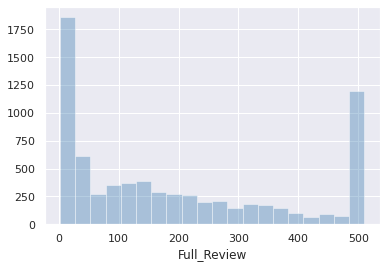

In [8]:
#Below is a plot showing the comment length frequency. As noticed, most of the comments are short with only a few comments longer than 1000 words and/or 1750.
sns.set(color_codes=True)
comment_len = train.Full_Review.str.len()
sns.distplot(comment_len, kde=False, bins=20, color="steelblue")

In [9]:
import matplotlib.pyplot as plt #plotting through matplot library
%matplotlib inline

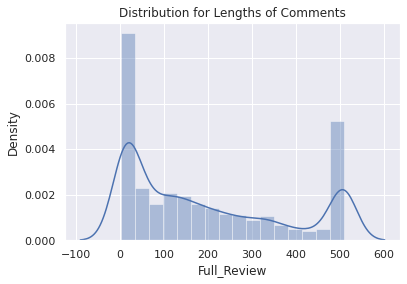

In [10]:
#we should see the similar if we plot through matplotlib:
lens = train.Full_Review.str.len()
sns.distplot(lens)
plt.title("Distribution for Lengths of Comments")
plt.show()

In [11]:
# checking null values
print(train.isnull().sum())

Short_Review    13895
Rating          13492
Full_Review     13895
dtype: int64


In [12]:
train.isnull().mean()

Short_Review    0.656788
Rating          0.637739
Full_Review     0.656788
dtype: float64

OK, checking the null values, we see that we have 65,67% of our Short_Reviews rows are missing, which means no values in there.

Regarding numerical feature Rating, we are missing 63,77% of the rows.

And finally, Full Reviews has also 65,67% of its rows which have no data/reviews/comments in there.

AxesSubplot(0.125,0.125;0.62x0.755)


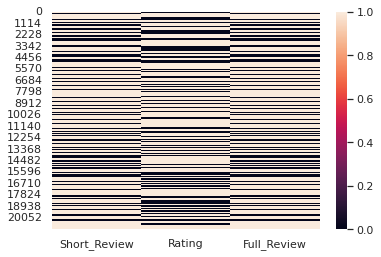

In [13]:
# checking null values through heatmap
print(sns.heatmap(train.isnull()))

#Blanks are the missing values. All 3 columns have missing data as commented previously.

So, let's drop missing values:

In [8]:
train=train.dropna(subset=['Short_Review','Full_Review'], how='all')
train

,Short_Review,Rating,Full_Review
0,Fabulous!,5.0,"i loved it, superb performance, awesome batter..."
1,Super!,5.0,I wonder why nobody posted pics for snow white...
2,Just wow!,5.0,An amazing device especially for high & smooth...
10,Classy product,5.0,Nice product. Value for Money. Go for it if yo...
11,Fabulous!,5.0,"Amazing product in price range , good sound qu..."
...,...,...,...
21137,Mind-blowing purchase,4.0,"Superb design and quality, appreciate before f..."
21138,Waste of money!,4.0,Worst product delivered by flipkart . Not made...
21146,Super!,NaN,Ultra clear display! Cool features like social...
21147,Awesome,NaN,Till now this one is the best which I have use...


Dropping first of all 'Short_Review' and 'Full_Review' Nan values when both have no values in it as we can't mapp the rating with any comment.

In [9]:
train=train.dropna(subset=['Rating'], how='all')
train

,Short_Review,Rating,Full_Review
0,Fabulous!,5.0,"i loved it, superb performance, awesome batter..."
1,Super!,5.0,I wonder why nobody posted pics for snow white...
2,Just wow!,5.0,An amazing device especially for high & smooth...
10,Classy product,5.0,Nice product. Value for Money. Go for it if yo...
11,Fabulous!,5.0,"Amazing product in price range , good sound qu..."
...,...,...,...
21127,Classy product,5.0,1. Display quality is very good.\n2. Very thin...
21128,Good quality product,4.0,Nice watch but battery life is complete 4 days
21137,Mind-blowing purchase,4.0,"Superb design and quality, appreciate before f..."
21138,Waste of money!,4.0,Worst product delivered by flipkart . Not made...


Dropping also the rows where we have NO RATINGS as we can't mapp the comments with any RATING number.

In [10]:
train['Rating'].unique() #checking RATING unique values we have now.

array([5., 4., 3.])

In [12]:
from matplotlib import pyplot as plt


<AxesSubplot:xlabel='Rating', ylabel='count'>

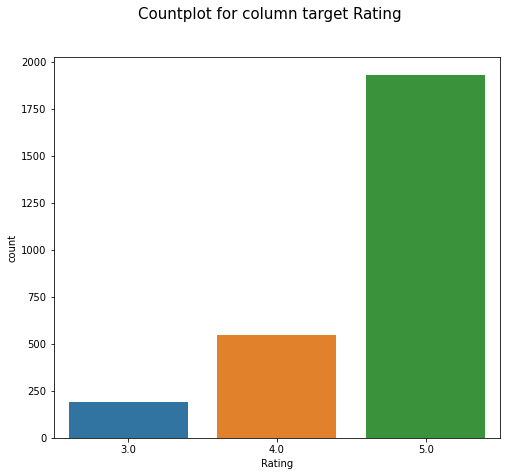

In [15]:
## Countplot for categorical variable Loan_Status:
fig, (ax1) = plt.subplots(1,1,figsize=(8,7))

fig.suptitle("Countplot for column target Rating", fontsize=15)

sns.countplot(x="Rating", data=train,ax=ax1)

We have an imbalance in our target feature, so we will re-balance it through the tecnique SMOTE

In [17]:
#Let’s see the distribution of each class within the table.
train['Rating'].value_counts(normalize=True)

5.0    0.723620
4.0    0.205407
3.0    0.070973
Name: Rating, dtype: float64

As we just mentioned, our target feature "Rating" is an imbalanced feature which has mostly rating number 5 and which represents 72% of the ratings. As we said, we will use SMOTE techique to adjust and remove this imbalance issue.

<AxesSubplot:>

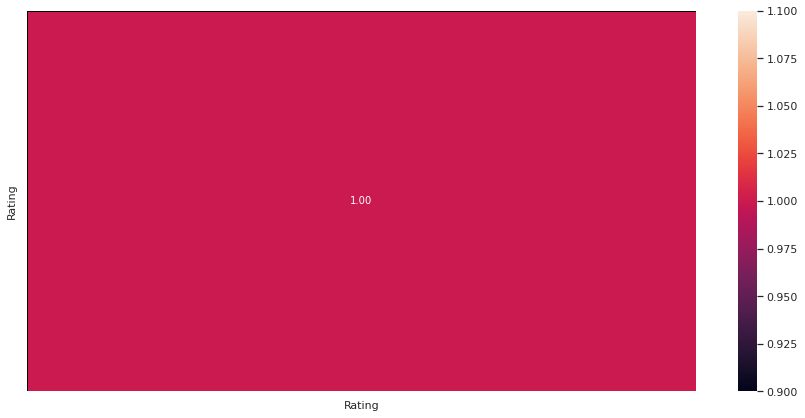

In [18]:
#Correlation using heatmap:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(train.corr(),annot=True,linewidths=0.5,linecolor="black",fmt='.2f')

No correlation is expected betweenour features features as we only have one numerical feature. No other numerical feature to correlate with.

In [19]:
# checking the skewness  for Rating:
train.skew()

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Rating   -1.551768
dtype: float64

In [20]:
pip install wordcloud #installing wordcloud for word representation and importance in our comments

Note: you may need to restart the kernel to use updated packages.


In [21]:
from wordcloud import WordCloud,STOPWORDS

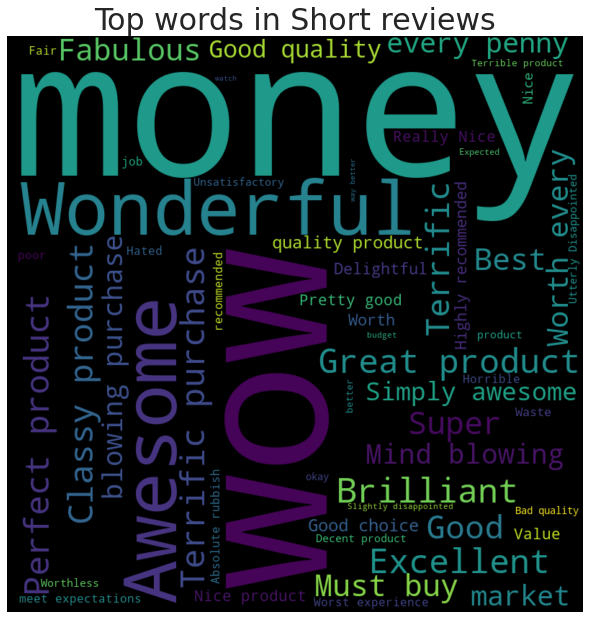

In [22]:
#definition of wordcloud function and applying it on the short_Review feature first:
def wordCloud_generator(train, title=None):
    wordcloud = WordCloud(width = 800, height = 800,
                          background_color ='black',
                          min_font_size = 10
                         ).generate(" ".join(train.values))                      
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title,fontsize=30)
    plt.show()
wordCloud_generator(train['Short_Review'], title="Top words in Short reviews")

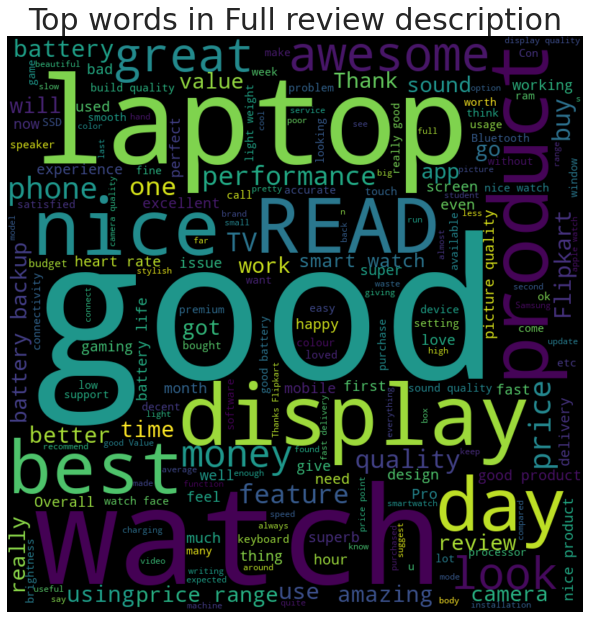

In [23]:
wordCloud_generator(train['Full_Review'], title="Top words in Full review description") #also applying it on Full_comments

In [24]:
# check for any 'null' comment
no_comment = train[train['Full_Review'].isnull()]
len(no_comment)

0

In [25]:
# check for any 'null' comment
no_comment = train[train['Short_Review'].isnull()]
len(no_comment)

0

OK, no null values in any column. Great, we can move forward now!

In [26]:
df=train

In [27]:
import nltk

In [28]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
df.reindex() #df.sort_index() #sorting index to avoid future issue when implementing ML.

,Short_Review,Rating,Full_Review
0,Fabulous!,5.0,"i loved it, superb performance, awesome batter..."
1,Super!,5.0,I wonder why nobody posted pics for snow white...
2,Just wow!,5.0,An amazing device especially for high & smooth...
10,Classy product,5.0,Nice product. Value for Money. Go for it if yo...
11,Fabulous!,5.0,"Amazing product in price range , good sound qu..."
...,...,...,...
21127,Classy product,5.0,1. Display quality is very good.\n2. Very thin...
21128,Good quality product,4.0,Nice watch but battery life is complete 4 days
21137,Mind-blowing purchase,4.0,"Superb design and quality, appreciate before f..."
21138,Waste of money!,4.0,Worst product delivered by flipkart . Not made...


In [30]:
df.reset_index(drop=True, inplace=True) #reseting index to avoid future issue when implementing ML.

In [31]:
df

,Short_Review,Rating,Full_Review
0,Fabulous!,5.0,"i loved it, superb performance, awesome batter..."
1,Super!,5.0,I wonder why nobody posted pics for snow white...
2,Just wow!,5.0,An amazing device especially for high & smooth...
3,Classy product,5.0,Nice product. Value for Money. Go for it if yo...
4,Fabulous!,5.0,"Amazing product in price range , good sound qu..."
...,...,...,...
2658,Classy product,5.0,1. Display quality is very good.\n2. Very thin...
2659,Good quality product,4.0,Nice watch but battery life is complete 4 days
2660,Mind-blowing purchase,4.0,"Superb design and quality, appreciate before f..."
2661,Waste of money!,4.0,Worst product delivered by flipkart . Not made...


In [32]:
df['Full_Review'][0:5]

0    i loved it, superb performance, awesome batter...
1    I wonder why nobody posted pics for snow white...
2    An amazing device especially for high & smooth...
3    Nice product. Value for Money. Go for it if yo...
4    Amazing product in price range , good sound qu...
Name: Full_Review, dtype: object

In [33]:
#library that contains punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [34]:
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
train['clean_Full_Review']= train['Full_Review'].apply(lambda x:remove_punctuation(x))
train['clean_Short_Review']= train['Short_Review'].apply(lambda x:remove_punctuation(x))
train.head()

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Short_Review,Rating,Full_Review,clean_Full_Review,clean_Short_Review
0,Fabulous!,5.0,"i loved it, superb performance, awesome batter...",i loved it superb performance awesome battery ...,Fabulous
1,Super!,5.0,I wonder why nobody posted pics for snow white...,I wonder why nobody posted pics for snow white...,Super
2,Just wow!,5.0,An amazing device especially for high & smooth...,An amazing device especially for high smooth ...,Just wow
3,Classy product,5.0,Nice product. Value for Money. Go for it if yo...,Nice product Value for Money Go for it if you ...,Classy product
4,Fabulous!,5.0,"Amazing product in price range , good sound qu...",Amazing product in price range good sound qua...,Fabulous


In [35]:
#lowering the allpahabet so that same words are imputed the same way and are not affected by different capitalizing cases.
train['clean_Full_Review_lower']= train['clean_Full_Review'].apply(lambda x: x.lower())
train['clean_Short_Review_lower']= train['clean_Short_Review'].apply(lambda x: x.lower())

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [36]:
#defining function for tokenization

'''Tokenization: 
In this step, the text is split into smaller units. We can use either sentence tokenization or word tokenization based on our problem statement.

Output: Sentences are tokenized into words.
'''

import re
def tokenization(text):
    tokens = re.split('W+',text)
    return tokens
#applying function to the column
train['Full_Review_tokenied']= train['clean_Full_Review_lower'].apply(lambda x: tokenization(x))
train['Short_Review_tokenied']= train['clean_Short_Review_lower'].apply(lambda x: tokenization(x))

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [37]:
 nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
#Stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

Stop word removal: 
Stopwords are the commonly used words and are removed from the text as they do not add any value to the analysis. These words carry less or no meaning.

In [39]:
#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

In [40]:
#applying the function
train['no_stopwords_Full']= train['Full_Review_tokenied'].apply(lambda x:remove_stopwords(x))
train['no_stopwords_Short']= train['Short_Review_tokenied'].apply(lambda x:remove_stopwords(x))

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Output: Stop words that are present in the nltk library such as in, until, to, I, here are removed from the tokenized text and the rest are stored in the no_stopwords column.

In [41]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [42]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /home/jovyan/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [43]:
'''Lemmatization: 
It stems the word but makes sure that it does not lose its meaning. 
Lemmatization has a pre-defined dictionary that stores the context of words and checks the word in the dictionary while diminishing.'''

from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

#defining the function for lemmatization
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text

#applying the function lemmatizer on the 2 comments columns
train['lemmatized_cmmt_Full']=train['no_stopwords_Full'].apply(lambda x:lemmatizer(x))
train['lemmatized_cmmt_Short']=train['no_stopwords_Short'].apply(lambda x:lemmatizer(x))
train

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,Short_Review,Rating,Full_Review,clean_Full_Review,clean_Short_Review,clean_Full_Review_lower,clean_Short_Review_lower,Full_Review_tokenied,Short_Review_tokenied,no_stopwords_Full,no_stopwords_Short,lemmatized_cmmt_Full,lemmatized_cmmt_Short
0,Fabulous!,5.0,"i loved it, superb performance, awesome batter...",i loved it superb performance awesome battery ...,Fabulous,i loved it superb performance awesome battery ...,fabulous,[i loved it superb performance awesome battery...,[fabulous],[i loved it superb performance awesome battery...,[fabulous],[i loved it superb performance awesome battery...,[fabulous]
1,Super!,5.0,I wonder why nobody posted pics for snow white...,I wonder why nobody posted pics for snow white...,Super,i wonder why nobody posted pics for snow white...,super,[i wonder why nobody posted pics for snow whit...,[super],[i wonder why nobody posted pics for snow whit...,[super],[i wonder why nobody posted pics for snow whit...,[super]
2,Just wow!,5.0,An amazing device especially for high & smooth...,An amazing device especially for high smooth ...,Just wow,an amazing device especially for high smooth ...,just wow,[an amazing device especially for high smooth...,[just wow],[an amazing device especially for high smooth...,[just wow],[an amazing device especially for high smooth...,[just wow]
3,Classy product,5.0,Nice product. Value for Money. Go for it if yo...,Nice product Value for Money Go for it if you ...,Classy product,nice product value for money go for it if you ...,classy product,[nice product value for money go for it if you...,[classy product],[nice product value for money go for it if you...,[classy product],[nice product value for money go for it if you...,[classy product]
4,Fabulous!,5.0,"Amazing product in price range , good sound qu...",Amazing product in price range good sound qua...,Fabulous,amazing product in price range good sound qua...,fabulous,[amazing product in price range good sound qu...,[fabulous],[amazing product in price range good sound qu...,[fabulous],[amazing product in price range good sound qu...,[fabulous]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2658,Classy product,5.0,1. Display quality is very good.\n2. Very thin...,1 Display quality is very good\n2 Very thin sm...,Classy product,1 display quality is very good\n2 very thin sm...,classy product,[1 display quality is very good\n2 very thin s...,[classy product],[1 display quality is very good\n2 very thin s...,[classy product],[1 display quality is very good\n2 very thin s...,[classy product]
2659,Good quality product,4.0,Nice watch but battery life is complete 4 days,Nice watch but battery life is complete 4 days,Good quality product,nice watch but battery life is complete 4 days,good quality product,[nice watch but battery life is complete 4 days],[good quality product],[nice watch but battery life is complete 4 days],[good quality product],[nice watch but battery life is complete 4 days],[good quality product]
2660,Mind-blowing purchase,4.0,"Superb design and quality, appreciate before f...",Superb design and quality appreciate before fe...,Mindblowing purchase,superb design and quality appreciate before fe...,mindblowing purchase,[superb design and quality appreciate before f...,[mindblowing purchase],[superb design and quality appreciate before f...,[mindblowing purchase],[superb design and quality appreciate before f...,[mindblowing purchase]
2661,Waste of money!,4.0,Worst product delivered by flipkart . Not made...,Worst product delivered by flipkart Not made ...,Waste of money,worst product delivered by flipkart not made ...,waste of money,[worst product delivered by flipkart not made...,[waste of money],[worst product delivered by flipkart not made...,[waste of money],[worst product delivered by flipkart not made...,[waste of money]


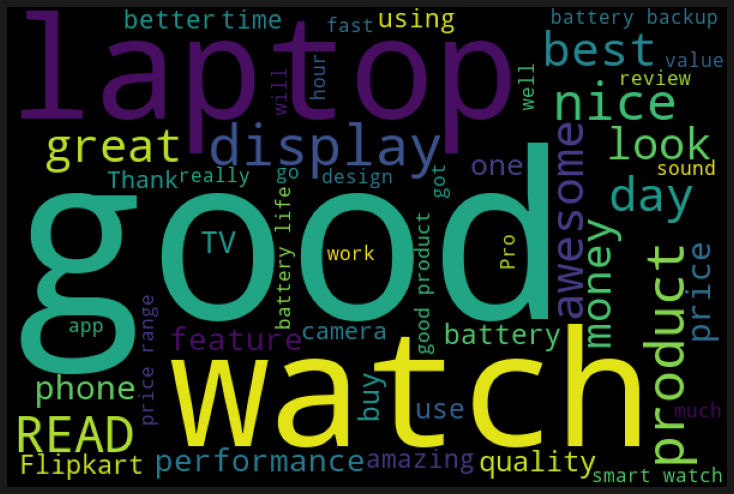

In [44]:
#In order to get an idea of what are the words that contribute the most to different labels, we generate word clouds.
#Getting words which are highly insulting and ofensive and are found more often in our dataset:
from wordcloud import WordCloud
cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(train['Full_Review']))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

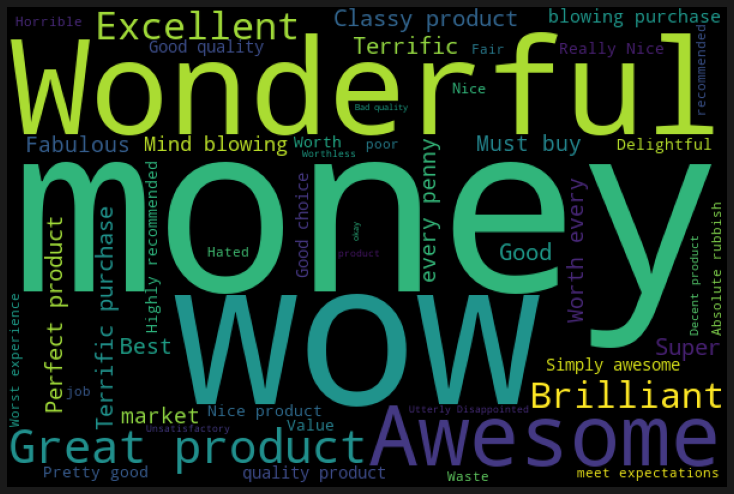

In [45]:
#In order to get an idea of what are the words that contribute the most to different labels, we generate word clouds.
#Getting words which are highly insulting and ofensive and are found more often in our dataset:
from wordcloud import WordCloud
cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(train['Short_Review']))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [46]:
train[['lemmatized_cmmt_Full','lemmatized_cmmt_Short']]

,lemmatized_cmmt_Full,lemmatized_cmmt_Short
0,[i loved it superb performance awesome battery...,[fabulous]
1,[i wonder why nobody posted pics for snow whit...,[super]
2,[an amazing device especially for high smooth...,[just wow]
3,[nice product value for money go for it if you...,[classy product]
4,[amazing product in price range good sound qu...,[fabulous]
...,...,...
2658,[1 display quality is very good\n2 very thin s...,[classy product]
2659,[nice watch but battery life is complete 4 days],[good quality product]
2660,[superb design and quality appreciate before f...,[mindblowing purchase]
2661,[worst product delivered by flipkart not made...,[waste of money]


In [47]:
train['lemmatized_cmmt_Full']=train['lemmatized_cmmt_Full'].apply(lambda x: ' '.join(x)) #joining all comments in case

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [48]:
train['lemmatized_cmmt_Full'].shape

(2663,)

In [49]:
#  Convert text into numerical vectors using TF-IDF Vectorizer
'''A tf-idf score is a decimal number that measures the importance of a word in any document. 
It gives small values to frequent words in all the documents and more weight to those more scarce across the corpus'''

from sklearn.feature_extraction.text import TfidfVectorizer
tf_vector = TfidfVectorizer(max_features =2,stop_words='english')
x = tf_vector.fit_transform(train['lemmatized_cmmt_Full'].values,train['lemmatized_cmmt_Small'].values)

In [53]:
#train and test split
from sklearn.model_selection import train_test_split, GridSearchCV
y=train['Rating']
#Transforming the data to remove the skewness:
from sklearn.preprocessing import power_transform
#x=power_transform(x.tolist(),method='yeo-johnson')
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=56,test_size=.25)

# we will use SMOTE technique to Balance out the data
from imblearn.over_sampling import SMOTE
x_train, y_train = SMOTE(k_neighbors=3).fit_resample(x_train, y_train)


In [54]:
x_train.shape

(1997, 2)

In [56]:
#Appling and training algorithm Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, confusion_matrix,classification_report
# LogisticRegression
LG = LogisticRegression(C=1, max_iter = 3000)

LG.fit(x_train, y_train)

y_pred_train = LG.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = LG.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.7205808713069605
Test accuracy is 0.7327327327327328
[[  0   0  55]
 [  0   0 123]
 [  0   0 488]]
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00        55
         4.0       0.00      0.00      0.00       123
         5.0       0.73      1.00      0.85       488

    accuracy                           0.73       666
   macro avg       0.24      0.33      0.28       666
weighted avg       0.54      0.73      0.62       666



/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
# Appling and training algorithm DecisionTreeClassifier

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()

DT.fit(x_train, y_train)
y_pred_train = DT.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = DT.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.7220831246870305
Test accuracy is 0.7282282282282282
[[  0   0  55]
 [  0   0 123]
 [  2   1 485]]
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00        55
         4.0       0.00      0.00      0.00       123
         5.0       0.73      0.99      0.84       488

    accuracy                           0.73       666
   macro avg       0.24      0.33      0.28       666
weighted avg       0.54      0.73      0.62       666



In [58]:
#Appling and training algorithm RandomForestClassifier
RF = RandomForestClassifier()

RF.fit(x_train, y_train)
y_pred_train = RF.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = RF.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.7220831246870305
Test accuracy is 0.7282282282282282
[[  0   0  55]
 [  0   0 123]
 [  2   1 485]]
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00        55
         4.0       0.00      0.00      0.00       123
         5.0       0.73      0.99      0.84       488

    accuracy                           0.73       666
   macro avg       0.24      0.33      0.28       666
weighted avg       0.54      0.73      0.62       666



In [59]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

#Appling and training algorithm AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=100)
ada.fit(x_train, y_train)
y_pred_train = ada.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = ada.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.7205808713069605
Test accuracy is 0.7327327327327328
[[  0   0  55]
 [  0   0 123]
 [  0   0 488]]
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00        55
         4.0       0.00      0.00      0.00       123
         5.0       0.73      1.00      0.85       488

    accuracy                           0.73       666
   macro avg       0.24      0.33      0.28       666
weighted avg       0.54      0.73      0.62       666



/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
#Appling and training algorithm KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train, y_train)
y_pred_train = knn.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = knn.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.7205808713069605
Test accuracy is 0.7327327327327328
[[  0   0  55]
 [  0   0 123]
 [  0   0 488]]
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00        55
         4.0       0.00      0.00      0.00       123
         5.0       0.73      1.00      0.85       488

    accuracy                           0.73       666
   macro avg       0.24      0.33      0.28       666
weighted avg       0.54      0.73      0.62       666



/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
# Appling and training algorithm RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(x_train, y_train)
y_pred_train = RF.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = RF.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))

Training accuracy is 0.7220831246870305
Test accuracy is 0.7282282282282282


In [62]:
from sklearn.metrics import hamming_loss       #we will evaluate our ML with log loss, hamming_loss, Recall and Precision.
from sklearn.metrics import log_loss

def evaluate_score(Y_test,predict): 
    loss = hamming_loss(Y_test,predict)
    print("Hamming_loss : {}".format(loss*100))


In [63]:
# calculate results
evaluate_score(y_test,y_pred_train)

Hamming_loss : 26.726726726726728


In [64]:
#cross validation of Random forest
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(RF, x, y, cv=2, scoring='accuracy')

In [65]:
#mean of cross validation:
cvmean=cvs.mean()
print('cross validation score :',cvmean*100)

cross validation score : 71.83627090651883


In [66]:
#confusion matrix and classification report:
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

[[  0   0  55]
 [  0   0 123]
 [  2   1 485]]
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00        55
         4.0       0.00      0.00      0.00       123
         5.0       0.73      0.99      0.84       488

    accuracy                           0.73       666
   macro avg       0.24      0.33      0.28       666
weighted avg       0.54      0.73      0.62       666



In [68]:
#Library for saving data
import pickle
filename='RF.pickle'
pickle.dump(RF,open(filename,'wb'))

In [69]:
#Conclusion
import pickle
loaded_model=pickle.load(open('RF.pickle','rb'))
result_v2=loaded_model.score(x_test,y_test)
print("Accuracy Score :",result_v2*100)


Accuracy Score : 72.82282282282281
